# 東京の気温について
1. 問題意識: 直近数年間、以前よりも日本の寒暖差は大きくなった気がしている。春と秋の期間が減り夏と冬の期間ばかりになってしまったような感じである。もしかするとこのように感じるのは、寒い日と暑い日しかないような印象を受けるからかもしれない。
2. 仮説:
 - 年単位: 「年間平均よりひどく寒い日と暑い日」が近年増えている？（＝1年における気温の標準偏差が年々大きくなっている？年平均気温から最低気温あるいは最高気温が逸脱する度合いが増えている？）
 - 月単位: 春（3-5月）と秋(9-11月)の最低気温が下がり最高気温が上がっている？夏（6-8月）は気温が上がり、冬（12-2月）は気温が下がっている？
 - 日単位: 1日の最低気温が下がり最高気温が上がっている？
3. 結果:
 - 年単位: 1年における気温の標準偏差が年々大きくなっているわけではないが、年平均気温から最低気温あるいは最高気温が逸脱する度合いが増えている。
 - 月単位: 春（3-5月）と秋(9-11月)は最高気温は年々上がっているが最低気温はそこまで下がっていない。夏（6-8月）は気温がやや上がり、冬（12-2月）は月によっては顕著に気温が下がっていると言える。
 - 日単位: 1日で見たときの最高気温と最低気温の差は年々大きくなっている。

4. 結論: 夏はより暑く、冬はより寒くなってきていると言えなくもない。また、1日における最高気温と最低気温の差が大きくなっているのは顕著である。
5. 考察: 1日の寒暖差が大きくなると、衣類などによる体温調節が難しくなることが考えられる。このために、私たちは主観的に思ったよりも寒いあるいは暑いと感じるのかもしれない。

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = "..\data"

In [90]:
df1995_2004 = pd.read_csv(path + "/01_raw/1995_2004.csv", skiprows = 4).dropna()[["年月日", "平均気温(℃)", "最高気温(℃)", "最低気温(℃)"]].rename({"年月日": "date", "平均気温(℃)": "mean_temp", "最高気温(℃)": "high_temp", "最低気温(℃)": "low_temp"}, axis=1)
df2005_2014 = pd.read_csv(path + "/01_raw/2005_2014.csv", skiprows = 4).dropna()[["年月日", "平均気温(℃)", "最高気温(℃)", "最低気温(℃)"]].rename({"年月日": "date", "平均気温(℃)": "mean_temp", "最高気温(℃)": "high_temp", "最低気温(℃)": "low_temp"}, axis=1)
df2015_2022 = pd.read_csv(path + "/01_raw/2015_2022.csv", skiprows = 4).dropna()[["年月日", "平均気温(℃)", "最高気温(℃)", "最低気温(℃)"]].rename({"年月日": "date", "平均気温(℃)": "mean_temp", "最高気温(℃)": "high_temp", "最低気温(℃)": "low_temp"}, axis=1)

df = pd.concat([pd.concat([df1995_2004, df2005_2014]), df2015_2022])
df["date"] = pd.to_datetime(df["date"])

df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df = df.set_index("date")
df = df["1995": "2021"]

df["diff_temp_high_low"] = df["high_temp"] - df["low_temp"]

# 年単位

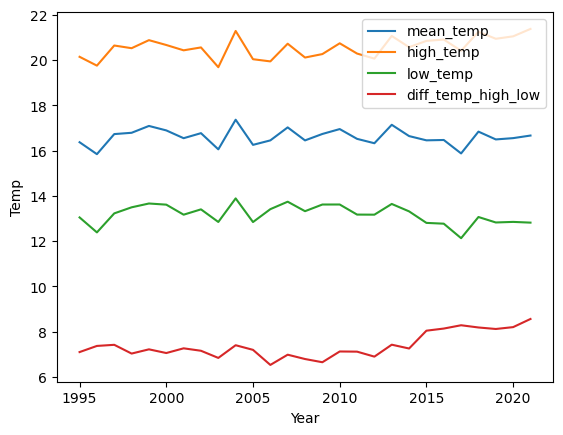

In [91]:
df_yearly_mean = df.groupby("year").mean()

df_yearly_mean[["mean_temp", "high_temp", "low_temp", "diff_temp_high_low"]].plot()
plt.xlabel("Year")
plt.ylabel("Temp")
plt.show()

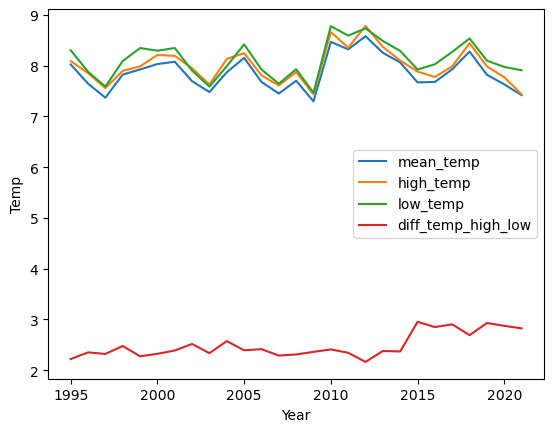

In [92]:
df_yearly_std = df.groupby("year").std()

df_yearly_std[["mean_temp", "high_temp", "low_temp", "diff_temp_high_low"]].plot()
plt.xlabel("Year")
plt.ylabel("Temp")
plt.show()


# 日単位

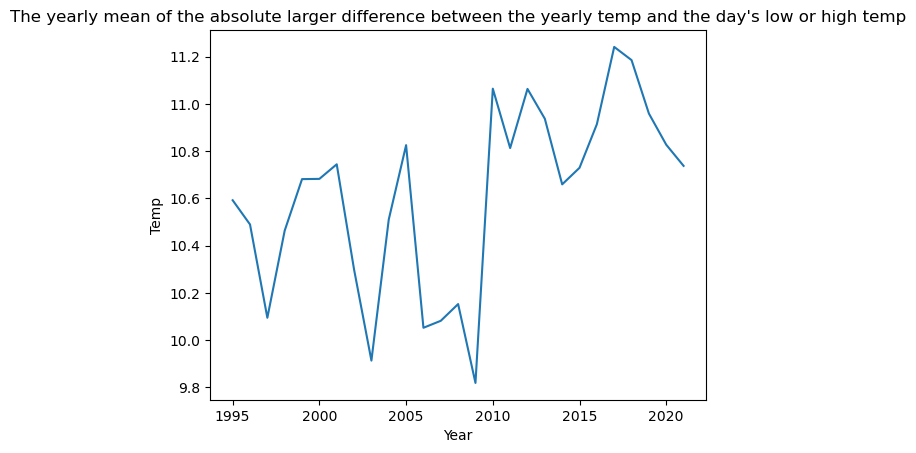

In [93]:
df_yearly_mean_of_mean = df.groupby("year").mean().reset_index()[["year", "mean_temp"]].rename({"mean_temp": "yearly_mean_temp"}, axis=1)
df_with_yearly_mean = pd.merge(df.reset_index(), df_yearly_mean_of_mean, left_on="year", right_on="year").set_index("date")
df_with_yearly_mean["diff_temp_high_yearly_mean"] = df_with_yearly_mean["high_temp"] - df_with_yearly_mean["yearly_mean_temp"]
df_with_yearly_mean["diff_temp_low_yearly_mean"] = df_with_yearly_mean["low_temp"] - df_with_yearly_mean["yearly_mean_temp"]
df_with_yearly_mean["diff_temp_high_yearly_mean_abs"] = np.abs(df_with_yearly_mean["diff_temp_high_yearly_mean"])
df_with_yearly_mean["diff_temp_low_yearly_mean_abs"] = np.abs(df_with_yearly_mean["diff_temp_low_yearly_mean"])
df_with_yearly_mean["diff_temp_larger_abs"] = df_with_yearly_mean["diff_temp_high_yearly_mean_abs"].where(df_with_yearly_mean["diff_temp_high_yearly_mean_abs"] > df_with_yearly_mean["diff_temp_low_yearly_mean_abs"], df_with_yearly_mean["diff_temp_low_yearly_mean_abs"])

df_with_yearly_mean.groupby("year").mean()["diff_temp_larger_abs"].plot()
plt.title("The yearly mean of the absolute larger difference between the yearly temp and the day's low or high temp")
plt.xlabel("Year")
plt.ylabel("Temp")
plt.show()

# 月単位

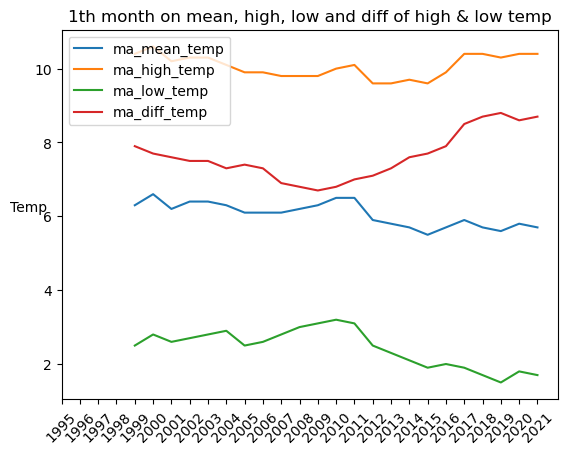

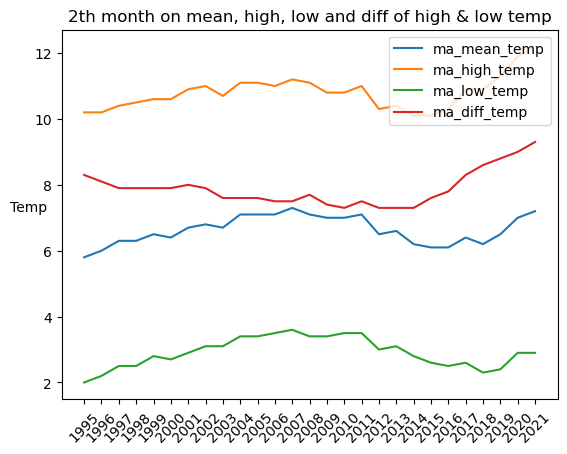

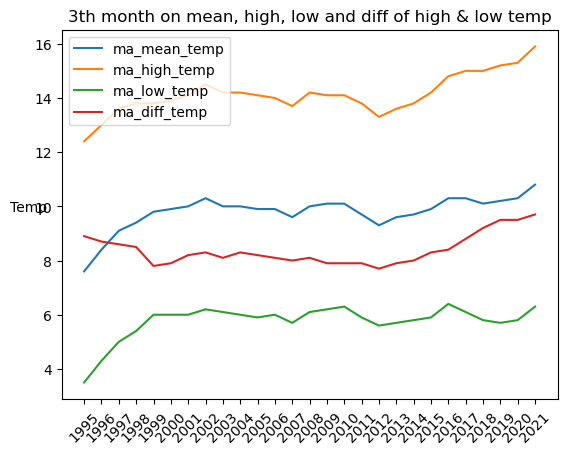

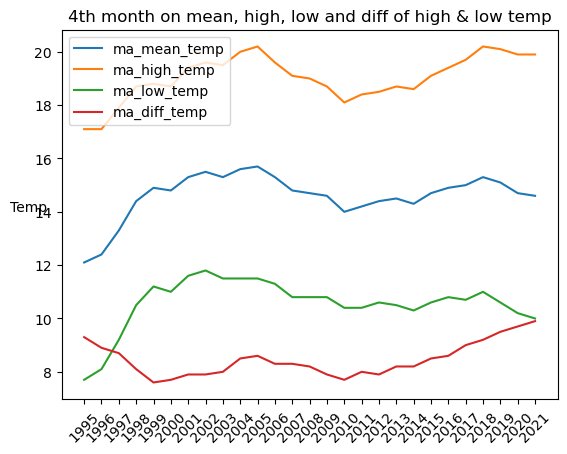

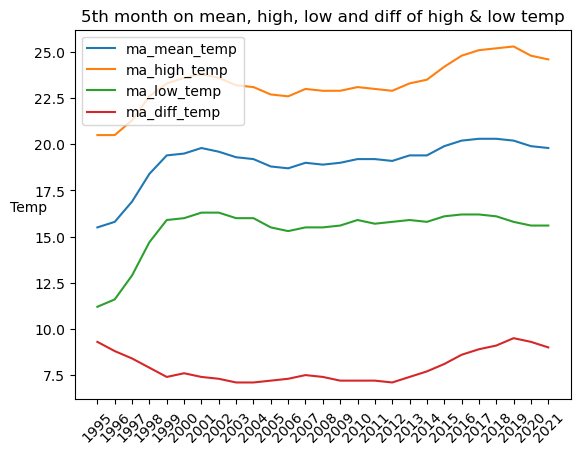

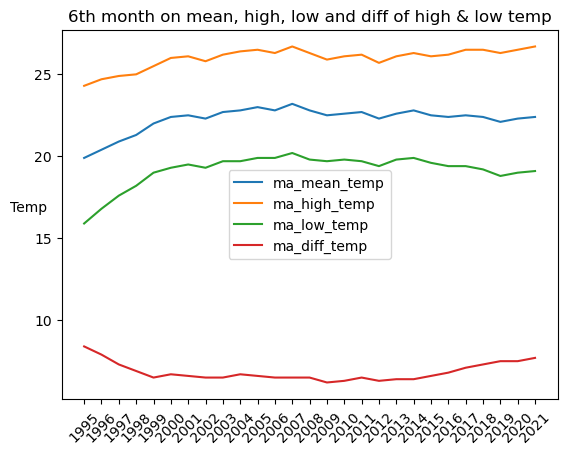

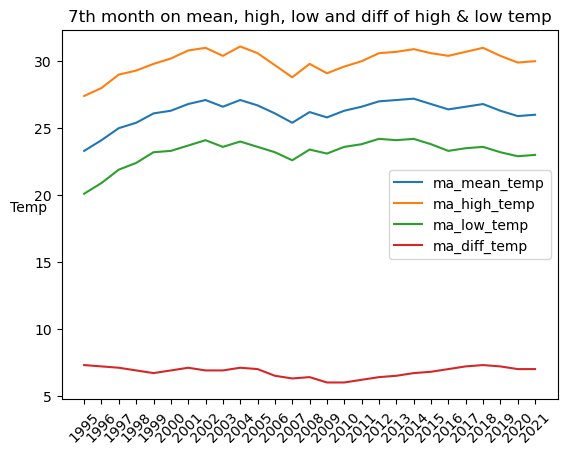

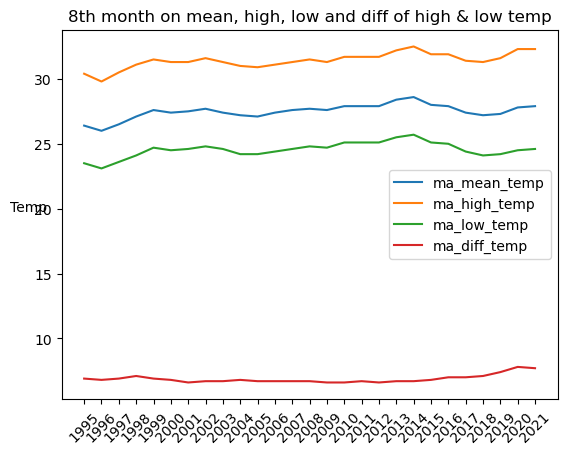

In [94]:
df_monthly_mean = df.groupby(["month", "year"]).mean().reset_index()
df_monthly_mean["ma_mean_temp"] = df_monthly_mean["mean_temp"].rolling(5).mean().round(1)
df_monthly_mean["ma_high_temp"] = df_monthly_mean["high_temp"].rolling(5).mean().round(1)
df_monthly_mean["ma_low_temp"] = df_monthly_mean["low_temp"].rolling(5).mean().round(1)
df_monthly_mean["ma_diff_temp"] = df_monthly_mean["diff_temp_high_low"].rolling(5).mean().round(1)


for i in range(1,12+1):
    df_monthly_mean[df_monthly_mean["month"]==i][["ma_mean_temp", "ma_high_temp", "ma_low_temp", "ma_diff_temp"]].reset_index(drop=True).plot()
    plt.title(f"{i}th month on mean, high, low and diff of high & low temp")
    plt.xticks(range(0, 27), range(1995, 2022), rotation=45)
    plt.ylabel("Temp", rotation=0)
    plt.show()